Naive Bayes 

## Loading Data

In [0]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [0]:
path_ = ''
p_data = pd.read_csv( path_ + 'preprocessed_data.csv' ,  nrows=50000)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = p_data['project_is_approved'].values
X = p_data.drop(['project_is_approved'], axis=1)

X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.33, stratify=y)
X_train , X_cv , y_train , y_cv = train_test_split( X_train , y_train , test_size=0.33, stratify=y_train)

In [32]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
print("Before vectorizations")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) 

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

Before vectorizations
(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
****************************************************************************************************
After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [33]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#Data Model for school_state
print("Data Model for school_state")
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Data Model for teacher_prefix
print("Data Model for teacher_prefix")
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Data Model for clean_categories
print("Data Model for clean_categories")
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_catg_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_catg_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_catg_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_catg_ohe.shape, y_train.shape)
print(X_cv_catg_ohe.shape, y_cv.shape)
print(X_test_catg_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

#Data Model for clean_subcategories
print("Data Model for clean_subcategories")
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcatg_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcatg_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcatg_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcatg_ohe.shape, y_train.shape)
print(X_cv_subcatg_ohe.shape, y_cv.shape)
print(X_test_subcatg_ohe.shape, y_test.shape)

print("="*100)

#Data Model for project_grade_category
print("Data Model for project_grade_category")
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_gcatg_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_gcatg_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_gcatg_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_gcatg_ohe.shape, y_train.shape)
print(X_cv_gcatg_ohe.shape, y_cv.shape)
print(X_test_gcatg_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)


# numerical features
# 
#Data Model for teacher_number_of_previously_posted_projects
print("Data Model for teacher_number_of_previously_posted_projects")
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_no_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_no_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_no_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_no_norm.shape, y_train.shape)
print(X_cv_teacher_no_norm.shape, y_cv.shape)
print(X_test_teacher_no_norm.shape, y_test.shape)
print("="*100)

#Data Model for project price
print("Data Model for project price")
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)


# Final Data Matrix
X_tr = hstack((X_train_essay_bow , X_train_state_ohe , X_train_teacher_prefix_ohe , \
               X_train_catg_ohe, X_train_subcatg_ohe ,X_train_gcatg_ohe, X_train_price_norm , X_train_teacher_no_norm )).tocsr()
X_cr = hstack((X_cv_essay_bow , X_cv_state_ohe , X_cv_teacher_prefix_ohe , \
               X_cv_catg_ohe, X_cv_subcatg_ohe , X_cv_gcatg_ohe, X_cv_price_norm , X_cv_teacher_no_norm )).tocsr()
X_te = hstack((X_test_essay_bow , X_test_state_ohe , X_test_teacher_prefix_ohe , \
          X_test_catg_ohe, X_test_subcatg_ohe , X_test_gcatg_ohe , X_test_price_norm , X_test_teacher_no_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Data Model for school_state
After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Data Model for teacher_prefix
After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
Data Model for clean_categories
After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Data Model for clean_subcategories
After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
Data Model for project_grade_category
After vectorizat

alpha: hyperparameters
{'alpha': [0.03, 0.2, 0.41, 0.42, 0.48, 0.52, 0.55, 0.62, 0.7, 0.94]}


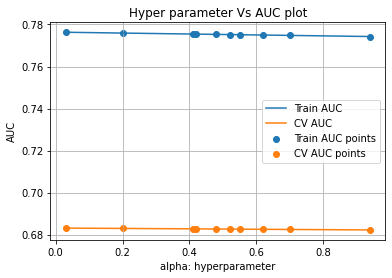

In [34]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

alpha_ = [ round(random.uniform(0.01,1.0) , 2) for i in range(10) ]

alpha_ = sorted(alpha_)

MN_NB = MultinomialNB(alpha=alpha_)
parameters = {'alpha': alpha_ }
print("alpha: hyperparameters")
print(parameters)
clf = RandomizedSearchCV( MN_NB , parameters, cv=3, scoring='roc_auc' , return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')

plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

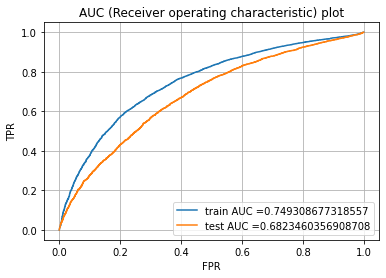

In [35]:
best_alpha_BOW = 0.94

MN_NB = MultinomialNB(alpha=best_alpha_BOW)
MN_NB.fit(X_tr, y_train)

y_train_pred = batch_predict(MN_NB, X_tr)
y_test_pred = batch_predict(MN_NB, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_for_BOW = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC (Receiver operating characteristic) plot")
plt.grid()
plt.show()

In [36]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4788339832437478 for threshold 0.891
Train confusion matrix
[[ 2524  1071]
 [ 5994 12856]]
Test confusion matrix
[[1617 1025]
 [4739 9119]]


## 2.1 Appling NB on different kind of featurization as mentioned in the instructions with TF-IDF

(Set-2 , TF-IDF )

In [37]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)
print("Data model for Essay")
tfidf_vec_essay = TfidfVectorizer(min_df=10 , ngram_range=(1,4), max_features=5000 )
tfidf_vec_essay.fit(X_train['essay'].values) 

X_train_essay_tfidf = tfidf_vec_essay.transform(X_train['essay'].values)
X_cv_essay_tfidf = tfidf_vec_essay.transform(X_cv['essay'].values)
X_test_essay_tfidf = tfidf_vec_essay.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
****************************************************************************************************
Data model for Essay
After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [39]:
print("Data model for school_state")
tfidf_vec_state = TfidfVectorizer()
#text_tfidf = tfidf_vectorizer.fit_transform(X_train['school_state'].values)
#print("Shape of matrix after one hot encodig ",text_tfidf.shape)

tfidf_vec_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_tfidf = tfidf_vec_state.transform(X_train['school_state'].values)
X_cv_state_tfidf = tfidf_vec_state.transform(X_cv['school_state'].values)
X_test_state_tfidf = tfidf_vec_state.transform(X_test['school_state'].values)

print("After Tf-Idf vectorizations")
print(X_train_state_tfidf.shape, y_train.shape)
print(X_cv_state_tfidf.shape, y_cv.shape)
print(X_test_state_tfidf.shape, y_test.shape)
print(tfidf_vec_state.get_feature_names())
print("="*100)

#
print("Data model for teacher_prefix")
tfidf_vec_teacher = TfidfVectorizer()
tfidf_vec_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_tfidf = tfidf_vec_teacher.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_tfidf = tfidf_vec_teacher.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_tfidf = tfidf_vec_teacher.transform(X_test['teacher_prefix'].values)

print("After Tf-Idf vectorizations")
print(X_train_teacher_prefix_tfidf.shape, y_train.shape)
print(X_cv_teacher_prefix_tfidf.shape, y_cv.shape)
print(X_test_teacher_prefix_tfidf.shape, y_test.shape)
print(tfidf_vec_teacher.get_feature_names())
print("="*100)

#
print("Data model for clean_categories")
tfidf_vec_catg = TfidfVectorizer()
tfidf_vec_catg.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_catg_tfidf = tfidf_vec_catg.transform(X_train['clean_categories'].values)
X_cv_catg_tfidf = tfidf_vec_catg.transform(X_cv['clean_categories'].values)
X_test_catg_tfidf = tfidf_vec_catg.transform(X_test['clean_categories'].values)

print("After Tf-Idf vectorizations")
print(X_train_catg_tfidf.shape, y_train.shape)
print(X_cv_catg_tfidf.shape, y_cv.shape)
print(X_test_catg_tfidf.shape, y_test.shape)
print(tfidf_vec_catg.get_feature_names())
print("="*100)

#
print("Data model for clean_subcategories")
tfidf_vec_subcatg = TfidfVectorizer()
tfidf_vec_subcatg.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcatg_tfidf = tfidf_vec_subcatg.transform(X_train['clean_subcategories'].values)
X_cv_subcatg_tfidf = tfidf_vec_subcatg.transform(X_cv['clean_subcategories'].values)
X_test_subcatg_tfidf = tfidf_vec_subcatg.transform(X_test['clean_subcategories'].values)

print("After Tf-Idf vectorizations")
print(X_train_subcatg_tfidf.shape, y_train.shape)
print(X_cv_subcatg_tfidf.shape, y_cv.shape)
print(X_test_subcatg_tfidf.shape, y_test.shape)

print("="*100)

#
print("Data model for project_grade_category")
tfidf_vec_gcatg = TfidfVectorizer()
tfidf_vec_gcatg.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_gcatg_tfidf = tfidf_vec_gcatg.transform(X_train['project_grade_category'].values)
X_cv_gcatg_tfidf = tfidf_vec_gcatg.transform(X_cv['project_grade_category'].values)
X_test_gcatg_tfidf = tfidf_vec_gcatg.transform(X_test['project_grade_category'].values)

print("After Tf-Idf vectorizations")
print(X_train_gcatg_tfidf.shape, y_train.shape)
print(X_cv_gcatg_tfidf.shape, y_cv.shape)
print(X_test_gcatg_tfidf.shape, y_test.shape)
print(tfidf_vec_gcatg.get_feature_names())
print("="*100)


X_tr = hstack((X_train_essay_tfidf , X_train_state_tfidf ,X_train_teacher_prefix_tfidf , \
               X_train_catg_tfidf , X_train_subcatg_tfidf ,X_train_gcatg_tfidf , X_train_price_norm , X_train_teacher_no_norm )).tocsr()
X_cr = hstack((X_cv_essay_tfidf , X_cv_state_tfidf ,X_cv_teacher_prefix_tfidf , \
               X_cv_catg_tfidf , X_cv_subcatg_tfidf , X_cv_gcatg_tfidf , X_cv_price_norm , X_cv_teacher_no_norm )).tocsr()
X_te = hstack((X_test_essay_tfidf , X_test_state_tfidf , X_test_teacher_prefix_tfidf , \
          X_test_catg_tfidf , X_test_subcatg_tfidf , X_test_gcatg_tfidf , X_test_price_norm ,  X_test_teacher_no_norm )).tocsr()

print("Final Data matrix for tfidf")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Data model for school_state
After Tf-Idf vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Data model for teacher_prefix
After Tf-Idf vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
Data model for clean_categories
After Tf-Idf vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Data model for clean_subcategories
After Tf-Idf vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
Data model for project_gra

alpha : hyperparameter
{'alpha': [0.27, 0.47, 0.57, 0.6, 0.69, 0.76, 0.8, 0.83, 0.91, 0.95]}


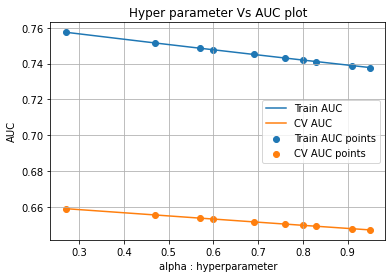

In [41]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred



alpha_ = [ round(random.uniform(0.01,1.0) , 2) for i in range(10) ]

alpha_ = sorted(alpha_)

MN_NB = MultinomialNB(alpha=alpha_)
parameters = {'alpha': alpha_ }
clf = RandomizedSearchCV( MN_NB , parameters, cv=3, scoring='roc_auc' , return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

print("alpha : hyperparameter")
print(parameters)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')

plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

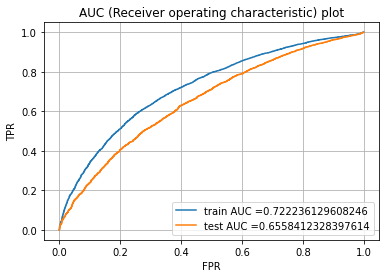

In [43]:
best_alpha_tfidf = 0.95

MN_NB = MultinomialNB(alpha=best_alpha_tfidf)
MN_NB.fit(X_tr, y_train)

y_train_pred = batch_predict(MN_NB, X_tr)
y_test_pred = batch_predict(MN_NB, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_for_tfidf = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC (Receiver operating characteristic) plot")
plt.grid()
plt.show()

In [44]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.44553480187262734 for threshold 0.851
Train confusion matrix
[[ 2400  1195]
 [ 6270 12580]]
Test confusion matrix
[[1530 1112]
 [4913 8945]]


In [45]:
all_features_lst = list(tfidf_vec_essay.get_feature_names() + tfidf_vec_state.get_feature_names() + \
                        tfidf_vec_gcatg.get_feature_names() + \
                        tfidf_vec_subcatg.get_feature_names() + \
                        tfidf_vec_catg.get_feature_names() + \
                        tfidf_vec_teacher.get_feature_names() + \
                    ["Price"] + ["teacher_number_of_previously_posted_projects"])



#https://stackoverflow.com/questions/52975761/difference-between-coef-and-feature-log-prob-in-multinomial-naive-bayes

sorted_prob_positive_indices = MN_NB.feature_log_prob_[1, :].argsort()

print("The features from Set 2(TF-IDF) using absolute values of feature_log_prob_ parameter of MultinomialNB ")
print("The top 20 features For positive class-1 :")
top_most = []
for index in sorted_prob_positive_indices[-20:]:
  top_most.append(all_features_lst[index])

print(top_most )

print("\n")
print("The top 20 features For negative class-2 :")
sorted_prob_negative_indices = MN_NB.feature_log_prob_[0, :].argsort()
top_most_0 = []
for index in sorted_prob_negative_indices[-20:]:
  top_most_0.append(all_features_lst[index])


print( top_most_0 )

The features from Set 2(TF-IDF) using absolute values of feature_log_prob_ parameter of MultinomialNB 
The top 20 features For positive class-1 :
['music_arts', 'ms', 'grades_6_8', 'environmentalscience', 'socialsciences', 'students', 'mrs', 'ca', 'visualarts', 'civics_government', 'warmth', 'teamsports', 'earlydevelopment', 'mr', 'grades_prek_2', 'communityservice', 'teacher', 'grades_9_12', 'teacher_number_of_previously_posted_projects', 'Price']


The top 20 features For negative class-2 :
['grades_6_8', 'ms', 'music_arts', 'care_hunger', 'environmentalscience', 'students', 'visualarts', 'ca', 'mrs', 'civics_government', 'teamsports', 'warmth', 'earlydevelopment', 'communityservice', 'mr', 'grades_prek_2', 'teacher', 'grades_9_12', 'teacher_number_of_previously_posted_projects', 'Price']


## 3.
<h1> Summary</h1>

<br> as mentioned in the step 5 of instructions

In [46]:
from prettytable import PrettyTable

t = PrettyTable(['Vectorizer', 'Model','Hyper parameter','AUC'])


t.add_row(['BOW', 'Multinomial NB', best_alpha_BOW , round(auc_for_BOW , 3 )])
t.add_row(['TFIDF', 'Multinomial NB', best_alpha_tfidf , round(auc_for_tfidf , 3 )])
print(t)

+------------+----------------+-----------------+-------+
| Vectorizer |     Model      | Hyper parameter |  AUC  |
+------------+----------------+-----------------+-------+
|    BOW     | Multinomial NB |       0.94      | 0.749 |
|   TFIDF    | Multinomial NB |       0.95      | 0.722 |
+------------+----------------+-----------------+-------+
